In [1]:
# This Part Contains Simulation of expected Success and 
# Different Appproaches to reach optimum value of Expected Success

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# transmission speed
# delta_t rv denoting difference in arrival times in signals
c = 3*10**2
# dc = rad
rad =  100
# calculated from the pdf 
t_rms = rad/(3*c)
# complimentary cdf (Theoretical)
def ccdf(t):
    #cdf 0f delta_t
    term = (4*c/(3*(rad**4)))*(2*(rad**3)*t - 1.5*(rad**2)*(c*t**2) + 0.25*(c**3)*(t**4))
    return 1- term
# ps_2  = probability of distinguishing two preamble transmissions of two UE (which select same preamble)
# ps_2 = probability(delta_t>t_rms) = ccdf()
p_s2 = ccdf(t_rms) 
print(p_s2)

lmbda = 1 + 2*p_s2

print(lmbda)

0.3292181069958847
1.6584362139917694


In [4]:
# R is the Number of available Preambles in a RA slot 
# m = Total number of UEs
m = 500
R = 120
# pi_R is the probability by which exactly i out of m select the same preamble
p_2R = m*(m-1)*((1/R)**2)*((1-1/R)**(m-2))/2
p_1R = (m/R)*((1-1/R)**(m-1))
print(R*(p_1R),R*p_2R)
# theretical Expectaion of Success when each UE participate
print('Expected Success = ',R*p_1R + R*p_s2*p_2R)

7.6817817030217395 16.105920461377508
Expected Success =  12.98414234874273


In [ ]:
# This Code snippet  Simulates Preamble Transmission and  
random.seed(0)
# pre_all This Dictionary records the nodes transmiiting the given preamble
# Initially no preamble is transmitted
pre_all = {}
for preamble in range(R+1):
    pre_all[preamble] = []
    
# probs array is appended with values number of successfully transimitted preambles in each slot
probs = []
b = []
# For 1000 slots 
for i in range(1000):
    # reinitialize 
    for preamble in range(R+1):
        pre_all[preamble] = []
    # This list is one to one mapping of nodes to their corresponding preamble
    pre_list = []
    # for each node
    for node in range(m):
        # allocate a preamble (randomly)
        allocated_preamble = random.randint(0,R)
        pre_list.append(allocated_preamble)
    k = list()
    l=0
    # Update the dictionary to get number of successful preamble transmissions
    for node,preamble in enumerate(pre_list):
        if np.random.rand() < 1:
            l+=1
            pre_all[preamble].append(node)
    #Number of preambles transmitted by only two nodes
    num2_succ = 0
    # number of preambles transmitted by only node
    num1_succ = 0
    lengths = np.arange(0,m,1)
    for preamble,nodes in pre_all.items():
        if len(nodes) == 1:
            num1_succ +=1
        if len(nodes) == 2:
            num2_succ +=1
    # append The result in array
    probs.append((num1_succ,num2_succ))
# Calculate average number of single and double tranmissions
sum1 = 0
sum2 = 0
for pair in probs:
    sum1 += pair[0]
    sum2 += pair[1]
# average number of preambles transmitted singularly 
term_1 = sum1/len(probs)
# Average Number of preambles transmitted by two nodes
term_2 = sum2/len(probs)
s2 = term_2*p_s2

print(l)
#print("-------------------------------------------------------------------------------------")
#for x,y in pre_all.items():
#    print(x,y)
#print("_------------------------------------------------------------------------------------")

print("Simulated Successful transmission: ",term_1 + s2)
#print(term_1 + term_2)


500
Simulated Successful transmission:  13.41611111111111


29 52.89411522633745 150.0


'\nprint("-------------------------------------------------------------------------------------")\nfor x,y in pre_all.items():\n    print(x,y)\nprint("_------------------------------------------------------------------------------------")\n'

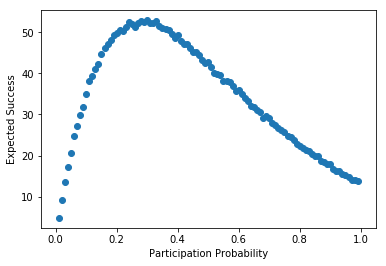

In [ ]:
# This Section simulates expected success if each of the node participates (transmits) with a given probility

# This function does a experiment which succeeds with a probability of threshold 
# and returns 1 if successful 0 otherwise
def get_result(threshold):
    return int (np.random.rand() < threshold)
# Records expected Success for each participation Probability
re = []
# Debugging Elements 
ma = []

b = []
# Same as above this list maintains one to one mapping 
pre_list = list()
prob_list = np.arange(0.01,1,0.01)
for part_prob in prob_list:
    pre_all= {}
    coll_arr = []
    probs = [] 
    for i in range(100):
        for preamble in range(R+1):
            pre_all[preamble] = []
    
        pre_list = []
        for node in range(m):
            allocated_preamble = random.randint(0,R)
            pre_list.append(allocated_preamble)
        k = list()
        l = 0 
        for node,preamble in enumerate(pre_list):
            # If the Experiment is successful then only Transmit probability(success) = part_prob
            if get_result(part_prob):
                l+=1
                pre_all[preamble].append(node)
        num2_succ = 0
        num1_succ = 0
        num_coll = 0
        lengths = np.arange(0,m,1)
        for preamble,nodes in pre_all.items(): 
            if len(nodes) == 1:
                num1_succ +=1
            elif len(nodes) == 2:
                num2_succ +=1
            elif len(nodes) > 2:
                num_coll  += 1 
        probs.append((num1_succ,num2_succ))
        coll_arr.append(num_coll)
    sum1 = 0
    sum2 = 0
    max1 = -1
    max2 = -1
    
    for pair in probs:
        sum1 += pair[0]
        sum2 += pair[1]
        max1 = max(pair[0],max1)
        max2 = max(pair[1],max2)
    ma.append(max1)
    term_1 = sum1/len(probs)
    term_2 = sum2/len(probs)
    #print(term_1 + p_s2*term_2)
    re.append(term_1 + p_s2*term_2)
    #print(l,part_prob)
    #print(sum(coll_arr)/len(coll_arr))
    b.append(part_prob)
# plot the results    
fig,ax = plt.subplots(1,1)
ax.scatter(prob_list,re)
ax.set_xlabel('Participation Probability')
ax.set_ylabel('Expected Success')
#print(re[-1])
k = 0
mi = -1
# get Optimum Success in mi 
mi_in = 0
for i,f in enumerate(re):
    if mi < max(f,mi):
        mi = max(f,mi)
        mi_in = i

print(mi_in,mi,prob_list[mi_in]*m)
    
"""
print("-------------------------------------------------------------------------------------")
for x,y in pre_all.items():
    print(x,y)
print("_------------------------------------------------------------------------------------")
"""

#print("-----------------------------------------------------------------------------------")
#print(pre_all)

##### This Section Tries sum adaptive approach to Settle  parameters of optimal success

In [ ]:
node_dict = {}
# Node Dict maintains the probability with which each UE participate in Preamble Transmission
part_list = {}
# This Dictionary Records Wether a node participated in last Aloha Slot
for node in range(m):
    node_dict[node] = 0.01
    part_list[node] = 0

In [ ]:
re = []
# Inthis approach Participation probability of a node reduced when it successfully transmits
# Else it is increased
# It didn't work
for i in range(300):
    pre_all = {}
    for preamble in range(R+1):
            pre_all[preamble] = []
    
    pre_list = []
    for node in range(m):
            allocated_preamble = random.randint(0,R)
            pre_list.append(allocated_preamble)
    k = list()
    l = 0 
    for node,preamble in enumerate(pre_list):
        part_prob = node_dict[node]
        
        if get_result(part_prob):
                l+=1
                pre_all[preamble].append(node)
        else:
            if node_dict[node] < 0.99:
                node_dict[node] += 0.01
    num2_succ = 0
    num1_succ = 0
    num_coll = 0
    lengths = np.arange(0,m,1)
    for preamble,nodes in pre_all.items(): 
        if len(nodes) == 1:
            #print(nodes)
            for node in nodes:
                if node_dict[node] > 0.02:
                    node_dict[node] -= 0.02
            num1_succ +=1
        elif len(nodes) == 2:
            for node in nodes:
                if node_dict[node] > 0.02:
                    #print(node_dict[node])
                    node_dict[node] -= 0.02
            num2_succ +=1
        elif len(nodes) > 2:
            for node in nodes:
                if node_dict[node] > 0.02:
                    node_dict[node] -= 0.01
            num_coll  += 1        
    probs.append((num1_succ,num2_succ))
    coll_arr.append(num_coll)
    #print(num_coll)
    #print("----------------------------------------------------------------------------------------------------------")
    sum1 = 0
    sum2 = 0
    for pair in probs:
        sum1 += pair[0]
        sum2 += pair[1]
    term_1 = sum1/len(probs)
    term_2 = sum2/len(probs)
    #print(term_1 + term_2)
    re.append(term_1 + p_s2*term_2)
    #print(l)
    #print(sum(coll_arr)/len(coll_arr))
print("Max Epected Success in this approach : ",max(re))
"""for x,y in node_dict.items():
    print(x,y)
"""
print("_------------------------------------------------------------------------------------")

Max Epected Success in this approach :  39.3119341563786
_------------------------------------------------------------------------------------


# EPC Gen2 Approach

In [ ]:
# In this approach Initially a Q is released 
# each node then chooses a value between 0,2**Q and if that value == 0 it participates in transmission 
# if a slot has certain number of collision Q is increased
# Else if there are  some successfull Transmission
# If there are idle slots Q remains unchanged and the chice of each is decremented by 1
# Q is decremented
np.random.seed(0)
def get_choice(Q,si):
    return np.random.randint(low = 0,high = 2**Q,size = si)

In [ ]:
# This act as a flag to indicate counter reset  
re_Q = 1
re = []
coll_arr = []
Q = 8
# This Dictionary Maintains The counter value for each node
node_counter = {}
for node in range(m):
    node_counter[node] = 0

for i in range(900): 
    #print(Q)
    pre_all = {}
    for preamble in range(R+1):
        pre_all[preamble] = []

    
    pre_list = []
    for node in range(m):
            allocated_preamble = random.randint(0,R)
            pre_list.append(allocated_preamble)
    k = list()
    l = 0
    if bool(re_Q):
        for node,choice in enumerate(get_choice(Q,m)):
            node_counter[node] = choice
    
    for node,preamble in enumerate(pre_list):
        if node_counter[node] == 0:
                l+=1
                pre_all[preamble].append(node)
    num2_succ = 0
    num1_succ = 0
    num_coll = 0
    lengths = np.arange(0,m,1)
    succ_nodes = list()
    for preamble,nodes in pre_all.items(): 
        if len(nodes) == 1:
            num1_succ += 1
        elif len(nodes) == 2:
            num2_succ +=1
        elif len(nodes) > 2:
       
            num_coll  += 1
    if num1_succ >= 20 or num2_succ >= 20:
        re_Q = 0
        for node in range(m):
                if node_counter[node] > 0:
                    node_counter[node] -= 1
                else:
                    node_counter[node] = np.random.randint(low = 0,high = 2**Q)
    elif num_coll > 60:
        re_Q = 1
        Q = min(9,Q+1)
    else:
        Q = max(0,Q-1)
    probs.append((num1_succ,num2_succ))
    coll_arr.append(num_coll)
    #print(num_coll)
    #print("----------------------------------------------------------------------------------------------------------")
    sum1 = 0
    sum2 = 0
    for pair in probs:
        sum1 += pair[0]
        sum2 += pair[1]
    term_1 = sum1/len(probs)
    term_2 = sum2/len(probs)
    #print(term_1 + term_2)
    re.append(term_1 + p_s2*term_2)
    #print(l)
    #print(sum(coll_arr)/len(coll_arr))
print(max(re))

print("-------------------------------------------------------------------------------------")

47.28436879270854
-------------------------------------------------------------------------------------


In [ ]:
# This is a very Naive Approach
# the part_prob is incremented or decremented if num of collisions and number of
# idle slots increases

# delta value for probaility
de = 0.001

part_prob = 0.05
idle_arr = []

re = []
pre_num_coll = 0 
pre_succ = 0
pre_num_idle = 0
for i in range(3000):
    pre_all = {}
    for preamble in range(R+1):
            pre_all[preamble] = []
    
    pre_list = []
    for node in range(m):
            allocated_preamble = random.randint(0,R)
            pre_list.append(allocated_preamble)
    k = list()
    l = 0 
    for node,preamble in enumerate(pre_list):
        if get_result(part_prob):
                l+=1
                pre_all[preamble].append(node)
    num2_succ = 0
    num1_succ = 0
    num_coll = 0
    num_idle = 0
    for preamble,nodes in pre_all.items(): 
        if len(nodes) == 1:
            num1_succ +=1
        elif len(nodes) == 2:
            num2_succ +=1
        elif len(nodes) > 2:
            num_coll  += 1        
        elif len(nodes) == 0:
            num_idle +=1
    lengths = np.arange(0,m,1)      
    probs.append((num1_succ,num2_succ))
    coll_arr.append(num_coll)
    idle_arr.append(num_idle)
    if num_coll + num_idle > pre_num_coll + pre_num_idle:  
        if num_coll - num_idle > 0:
            part_prob -= de
        else:
            part_prob += de
    
    pre_num_coll = num_coll 
    pre_num_idle = num_idle
        
    #print(num_coll)
    #print("----------------------------------------------------------------------------------------------------------")
    sum1 = 0
    sum2 = 0
    for pair in probs:
        sum1 += pair[0]
        sum2 += pair[1]
    term_1 = sum1/len(probs)
    term_2 = sum2/len(probs)
    #print(term_1 + term_2)
    re.append(term_1 + p_s2*term_2)
    #print(part_prob)
    #print(l)
    #print(sum(coll_arr)/len(coll_arr))
print(max(re))
print(sum(re)/len(re))
print(mi)

48.33323569362958
47.34324934544426
52.89411522633745


# Q approach

In this Q is a design parameter. this protocol works like EPC gen2. If sum of number of collisions or number of idle slots increases, then call for a change in Q.
If change in collisions is greater than change in idle slots then increment Q
else decrement Q

If the sum is same then decrement the counters 
For nodes who have Succesfully transmitted reset the counters

In [ ]:
Q = 16
# This Function takes Q and returns array of random integers in [0,2**Q] of size si
def get_choices(Q,si):
    return np.random.randint(low = 0,high = 2**Q,size = si)


In [ ]:
# This Flag indicates wether to reset counters or not
re_Q = 1
# Records success in each slot
re = []
# Initialize Q
Q = 9
# maintain a list of number of preambles not transmitted in each slot
idle_arr = []
re = []
# number of collsions in previos slot
pre_num_coll = 0 
# number of success in previous slots
pre_succ = 0
# number of idle preambles in previous slots 
pre_num_idle = 0
# This Dictionary maintains counter of each node
node_counter = {}
# record collsions in each slots
coll_arr = []
# record number of idle preambles in each slots
idle_arr = []
for node in range(m):
    node_counter[node] = 0
# Simulation Starts
for i in range(600): 
    # This Dictionary maintains list of nodes opting a given preamble
    pre_all = {}
    for preamble in range(R+1):
        pre_all[preamble] = []
    # List of chosen preamble by each UE
    # Note That enumerate object of this list is sort of like a dictionary which maintains preamble chosen by each node
    pre_list = []
    for node in range(m):
            # For each node get Allocated Node
            allocated_preamble = random.randint(0,R)
            # For that node update pre_list
            pre_list.append(allocated_preamble)
    k = list()
    l = 0
    # If asked to reset counters 
    if bool(re_Q):
        #reset counters
        for node,choice in enumerate(get_choices(Q,m)):
            node_counter[node] = choice
    
    for node,preamble in enumerate(pre_list):
        # if counter of node turns out to be 0 it transmits 
        if node_counter[node] == 0:
                l+=1
                # update dictionary trasmitted preambles
                pre_all[preamble].append(node)
    
    num2_succ = 0
    num1_succ = 0
    num_coll = 0
    num_idle = 0
    lengths = np.arange(0,m,1)
    succ_nodes = list()
    for preamble,nodes in pre_all.items(): 
        if len(nodes) == 1:
            num1_succ += 1
            # Reset counters of participating nodes
            for node in nodes:
                node_counter[node] = np.random.randint(0,2**Q)
        elif len(nodes) == 2:
            num2_succ +=1
            # reset Counters of participating nodes
            for node in nodes:
                node_counter[node] = np.random.randint(0,2**Q)
        elif len(nodes) > 2:
            num_coll  += 1
        elif len(nodes) == 0:
            num_idle+=1
    
    coll_arr.append(num_coll)
    idle_arr.append(num_idle)
    m_coll = sum(coll_arr)/len(coll_arr)
    # Mean of collisions till now
    # if sum of collisions and idle is greater than previous sum
    if num_coll + num_idle > pre_num_coll + pre_num_idle:  
        #re_Q = 0
        # if number of collsions is more than idle slots
        # increment Q
        if num_coll - num_idle > 0:
            re_Q = 1
            Q = min(16,Q+1)
        # Else reduce Q
        else:
            re_Q = 1
            Q = max(0,Q-1)
    # Else just decrease the counters
    else:
        for node in range(m):
            re_Q = 0 
            if node_counter[node] > 0:
                    node_counter[node] -= 1
            else:
                    # reset if they already reached 0
                    node_counter[node] = np.random.randint(low = 0,high = 2**Q)


    # Record the result in this slot
    probs.append((num1_succ,num2_succ))
    #print("== ",Q," ==")
    coll_arr = list(coll_arr)
    coll_arr.append(num_coll)
    pre_num_coll = num_coll
    pre_num_idle = num_idle
    #print(num_coll)
    #print("----------------------------------------------------------------------------------------------------------")
    sum1 = 0
    sum2 = 0
    for pair in probs:
        sum1 += pair[0]
        sum2 += pair[1]
    term_1 = sum1/len(probs)
    term_2 = sum2/len(probs)
    #print(term_1 + term_2)
    re.append(term_1 + p_s2*term_2)
    #print(l)
    #print(sum(coll_arr)/len(coll_arr))
print('Maximum Expected Success : ',max(re))
print('Average Expexted success : ',sum(re)/len(re))
print("-------------------------------------------------------------------------------------")

Maximum Expected Success :  48.322433389497895
Average Expexted success :  48.118825298767284
-------------------------------------------------------------------------------------


## Agreement between Simulated optimum and adapted optimum 

In [ ]:
num_ue = [800,1300,1800]
num_preambles = [120, 180, 240]
sim_max = []
adptv_max = []
adptv_avg = []
for m in num_ue:
    for R in num_preambles:
        re = []
        # Debugging Elements 
        ma = []
        b = []
        # Same as above this list maintains one to one mapping 
        pre_list = list()
        # This Flag indicates wether to reset counters or not
        re_Q = 1
        # Records success in each slot
        re = []
        # Initialize Q
        Q = 8
        # maintain a list of number of preambles not transmitted in each slot
        idle_arr = []
        re = []
        # number of collsions in previos slot
        pre_num_coll = 0 
        # number of success in previous slots
        pre_succ = 0
        # number of idle preambles in previous slots 
        pre_num_idle = 0
        # This Dictionary maintains counter of each node
        node_counter = {}
        # record collsions in each slots
        coll_arr = []
        # record number of idle preambles in each slots
        idle_arr = []
        for node in range(m):
            node_counter[node] = 0
        prob_list = np.arange(0.01,1,0.01)
        for part_prob in prob_list:
            pre_all= {}
            coll_arr = []
            probs = [] 
            for i in range(100):
                for preamble in range(R+1):
                    pre_all[preamble] = []
                pre_list = []
                for node in range(m):
                    allocated_preamble = random.randint(0,R)
                    pre_list.append(allocated_preamble)
                k = list()
                l = 0 
                for node,preamble in enumerate(pre_list):
                    # If the Experiment is successful then only Transmit probability(success) = part_prob
                    if get_result(part_prob):
                        l+=1
                        pre_all[preamble].append(node)
                num2_succ = 0
                num1_succ = 0
                num_coll = 0
                lengths = np.arange(0,m,1)
                for preamble,nodes in pre_all.items(): 
                    if len(nodes) == 1:
                        num1_succ +=1
                    elif len(nodes) == 2:
                        num2_succ +=1
                    elif len(nodes) > 2:
                        num_coll  += 1 
                probs.append((num1_succ,num2_succ))
                coll_arr.append(num_coll)
            sum1 = 0
            sum2 = 0
            max1 = -1
            max2 = -1

            for pair in probs:
                sum1 += pair[0]
                sum2 += pair[1]
                max1 = max(pair[0],max1)
                max2 = max(pair[1],max2)
            ma.append(max1)
            term_1 = sum1/len(probs)
            term_2 = sum2/len(probs)
            #print(term_1 + p_s2*term_2)
            re.append(term_1 + p_s2*term_2)
            #print(l,part_prob)
            #print(sum(coll_arr)/len(coll_arr))
            b.append(part_prob)
        mi = -1
        mi_in = 0
        for i,f in enumerate(re):
            if mi < max(f,mi):
                mi = max(f,mi)
                mi_in = i

        print('Maximum Success : ',mi)
        
        re = []
        for i in range(2000): 
            # This Dictionary maintains list of nodes opting a given preamble
            pre_all = {}
            for preamble in range(R+1):
                pre_all[preamble] = []
            # List of chosen preamble by each UE
            # Note That enumerate object of this list is sort of like a dictionary which maintains preamble chosen by each node
            pre_list = []
            for node in range(m):
                    # For each node get Allocated Node
                    allocated_preamble = random.randint(0,R)
                    # For that node update pre_list
                    pre_list.append(allocated_preamble)
            k = list()
            l = 0
            # If asked to reset counters 
            if bool(re_Q):
                #reset counters
                for node,choice in enumerate(get_choices(Q,m)):
                    node_counter[node] = choice

            for node,preamble in enumerate(pre_list):
                # if counter of node turns out to be 0 it transmits 
                if node_counter[node] == 0:
                        l+=1
                        # update dictionary trasmitted preambles
                        pre_all[preamble].append(node)

            num2_succ = 0
            num1_succ = 0
            num_coll = 0
            num_idle = 0
            lengths = np.arange(0,m,1)
            succ_nodes = list()
            for preamble,nodes in pre_all.items(): 
                if len(nodes) == 1:
                    num1_succ += 1
                    # Reset counters of participating nodes
                    for node in nodes:
                        node_counter[node] = np.random.randint(0,2**Q)
                elif len(nodes) == 2:
                    num2_succ +=1
                    # reset Counters of participating nodes
                    for node in nodes:
                        node_counter[node] = np.random.randint(0,2**Q)
                elif len(nodes) > 2:
                    num_coll  += 1
                elif len(nodes) == 0:
                    num_idle+=1

            coll_arr.append(num_coll)
            idle_arr.append(num_idle)
            m_coll = sum(coll_arr)/len(coll_arr)
            # Mean of collisions till now
            # if sum of collisions and idle is greater than previous sum
            if num_coll + num_idle > pre_num_coll + pre_num_idle:  
                #re_Q = 0
                # if number of collsions is more than idle slots
                # increment Q
                if num_coll - num_idle > 0:
                    re_Q = 1
                    Q = min(16,Q+1)
                # Else reduce Q
                else:
                    re_Q = 1
                    Q = max(0,Q-1)
            # Else just decrease the counters
            else:
                for node in range(m):
                    re_Q = 0 
                    if node_counter[node] > 0:
                            node_counter[node] -= 1
                    else:
                            # reset if they already reached 0
                            node_counter[node] = np.random.randint(low = 0,high = 2**Q)


            # Record the result in this slot
            probs.append((num1_succ,num2_succ))
            #print("== ",Q," ==")
            coll_arr = list(coll_arr)
            coll_arr.append(num_coll)
            pre_num_coll = num_coll
            pre_num_idle = num_idle
            #print(num_coll)
            #print("----------------------------------------------------------------------------------------------------------")
            sum1 = 0
            sum2 = 0
            for pair in probs:
                sum1 += pair[0]
                sum2 += pair[1]
            term_1 = sum1/len(probs)
            term_2 = sum2/len(probs)
            #print(term_1 + term_2)
            re.append(term_1 + p_s2*term_2)
            #print(l)
            #print(sum(coll_arr)/len(coll_arr))
        print('Maximum Adaptive Expected Success : ',max(re))
        print('Average Adaptive Expected success : ',sum(re)/len(re))
        print("-------------------------------------------------------------------------------------")
        sim_max.append(mi)
        adptv_max.append(max(re))
        adptv_avg.append(sum(re[len(re)-21:-1])/20)

Maximum Success :  52.65382716049382
Maximum Adaptive Expected Success :  44.856840361794525
Average Adaptive Expected success :  39.801702494645376
-------------------------------------------------------------------------------------
Maximum Success :  79.35761316872428
Maximum Adaptive Expected Success :  67.1010405643739
Average Adaptive Expected success :  60.82628339829314
-------------------------------------------------------------------------------------
Maximum Success :  105.00115226337448
Maximum Adaptive Expected Success :  90.8173456004775
Average Adaptive Expected success :  85.10496058466953
-------------------------------------------------------------------------------------
Maximum Success :  52.604814814814816
Maximum Adaptive Expected Success :  45.11026374324754
Average Adaptive Expected success :  39.94362009744078
-------------------------------------------------------------------------------------
Maximum Success :  78.96880658436214
Maximum Adaptive Expected Suc

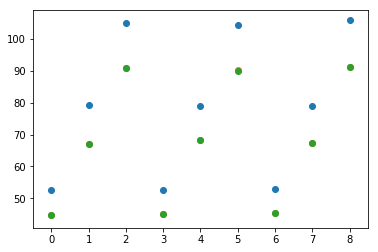

In [ ]:
comb = np.arange(0,9,1)

fig1,ax1 = plt.subplots()
ax1.scatter(comb,sim_max)
ax1.scatter(comb,adptv_max)
ax1.scatter(comb,adptv_avg)

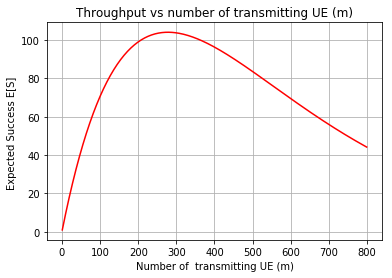

In [ ]:
ana = []
m_list = np.arange(1,800,3)
for nt in m_list:
    avg = nt*(1 + p_s2*(nt-1)/(2*(R-1)))*(1-1/R)**(nt-1)
    ana.append(avg)
fig7,ax7 = plt.subplots()
ax7.plot(m_list,ana,color = 'red')
ax7.set_ylabel('Expected Success E[S] ')
plt.grid(True)
ax7.set_xlabel('Number of  transmitting UE (m)')
ax7.set_title('Throughput vs number of transmitting UE (m)')
plt.savefig('Analytival_Model.png')

In [27]:
n_seeds = np.arange(0,30,1)
seed_sim_max = []
seed_adptv_max = []
seed_adptv_avg = []


for seed in n_seeds:
    np.random.seed()
    num_ue = [500,800]
    num_preambles = [120, 180]
    sim_max = []
    adptv_max = []
    adptv_avg = []
    for m in num_ue:
        for R in num_preambles:
            re = []
            # Debugging Elements 
            ma = []
            b = []
            # Same as above this list maintains one to one mapping 
            pre_list = list()
            # This Flag indicates wether to reset counters or not
            re_Q = 1
            # Records success in each slot
            re = []
            # Initialize Q
            Q = 8
            # maintain a list of number of preambles not transmitted in each slot
            idle_arr = []
            re = []
            # number of collsions in previos slot
            pre_num_coll = 0 
            # number of success in previous slots
            pre_succ = 0
            # number of idle preambles in previous slots 
            pre_num_idle = 0
            # This Dictionary maintains counter of each node
            node_counter = {}
            # record collsions in each slots
            coll_arr = []
            # record number of idle preambles in each slots
            idle_arr = []


            re = []
            for i in range(1200): 
                # This Dictionary maintains list of nodes opting a given preamble
                pre_all = {}
                for preamble in range(R+1):
                    pre_all[preamble] = []
                # List of chosen preamble by each UE
                # Note That enumerate object of this list is sort of like a dictionary which maintains preamble chosen by each node
                pre_list = []
                for node in range(m):
                        # For each node get Allocated Node
                        allocated_preamble = random.randint(0,R)
                        # For that node update pre_list
                        pre_list.append(allocated_preamble)
                k = list()
                l = 0
                # If asked to reset counters 
                if bool(re_Q):
                    #reset counters
                    for node,choice in enumerate(get_choices(Q,m)):
                        node_counter[node] = choice

                for node,preamble in enumerate(pre_list):
                    # if counter of node turns out to be 0 it transmits 
                    if node_counter[node] == 0:
                            l+=1
                            # update dictionary trasmitted preambles
                            pre_all[preamble].append(node)

                num2_succ = 0
                num1_succ = 0
                num_coll = 0
                num_idle = 0
                lengths = np.arange(0,m,1)
                succ_nodes = list()
                for preamble,nodes in pre_all.items(): 
                    if len(nodes) == 1:
                        num1_succ += 1
                        # Reset counters of participating nodes
                        for node in nodes:
                            node_counter[node] = np.random.randint(0,2**Q)
                    elif len(nodes) == 2:
                        num2_succ +=1
                        # reset Counters of participating nodes
                        for node in nodes:
                            node_counter[node] = np.random.randint(0,2**Q)
                    elif len(nodes) > 2:
                        num_coll  += 1
                    elif len(nodes) == 0:
                        num_idle+=1

                coll_arr.append(num_coll)
                idle_arr.append(num_idle)
                m_coll = sum(coll_arr)/len(coll_arr)
                # Mean of collisions till now
                # if sum of collisions and idle is greater than previous sum
                if num_coll + num_idle > pre_num_coll + pre_num_idle:  
                    #re_Q = 0
                    # if number of collsions is more than idle slots
                    # increment Q
                    if num_coll - num_idle > 0:
                        re_Q = 1
                        Q = min(16,Q+1)
                    # Else reduce Q
                    else:
                        re_Q = 1
                        Q = max(0,Q-1)
                # Else just decrease the counters
                else:
                    for node in range(m):
                        re_Q = 0 
                        if node_counter[node] > 0:
                                node_counter[node] -= 1
                        else:
                                # reset if they already reached 0
                                node_counter[node] = np.random.randint(low = 0,high = 2**Q)


                # Record the result in this slot
                probs.append((num1_succ,num2_succ))
                #print("== ",Q," ==")
                coll_arr = list(coll_arr)
                coll_arr.append(num_coll)
                pre_num_coll = num_coll
                pre_num_idle = num_idle
                #print(num_coll)
                #print("----------------------------------------------------------------------------------------------------------")
                sum1 = 0
                sum2 = 0
                for pair in probs:
                    sum1 += pair[0]
                    sum2 += pair[1]
                term_1 = sum1/len(probs)
                term_2 = sum2/len(probs)
                #print(term_1 + term_2)
                re.append(term_1 + p_s2*term_2)
                
                #print(l)
                #print(sum(coll_arr)/len(coll_arr))
            print('Maximum Adaptive Expected Success : ',max(re))
            print('Average Adaptive Expected success : ',sum(re)/len(re))
            print("-------------------------------------------------------------------------------------")
            #sim_max.append(mi)
            adptv_max.append(max(re))
            adptv_avg.append(sum(re[len(re)-21:-1])/20)
    #seed_sim_max.append(sum(sim_max)/len(sim_max))
    seed_adptv_max.append(sum(adptv_max)/len(adptv_max))
    seed_adptv_avg.append(sum(adptv_avg)/len(adptv_avg))

Maximum Adaptive Expected Success :  69.72311524835102
Average Adaptive Expected success :  69.61079576272348
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  69.50168094425216
Average Adaptive Expected success :  69.49897253991892
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  69.5003483248714
Average Adaptive Expected success :  69.39622671351749
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  69.29800304278261
Average Adaptive Expected success :  69.29272515535872
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  69.29747862957404
Average Adaptive Expected success :  69.18883746190222
-------------------------------------------------------------------------------------
Maximum Adaptive Expe

Maximum Adaptive Expected Success :  66.16751381730009
Average Adaptive Expected success :  66.10400336319832
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  66.0664455628464
Average Adaptive Expected success :  66.05247205672497
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  66.06609554374882
Average Adaptive Expected success :  66.00041406693332
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  65.96238900080519
Average Adaptive Expected success :  65.94965423535953
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  65.96201230011874
Average Adaptive Expected success :  65.90089050388823
-------------------------------------------------------------------------------------
Maximum Adaptive Expe

Maximum Adaptive Expected Success :  64.41843414495222
Average Adaptive Expected success :  64.37126421618946
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  64.35121317951322
Average Adaptive Expected success :  64.33710060479343
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  64.35089389121669
Average Adaptive Expected success :  64.30554567439144
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  64.29134749904821
Average Adaptive Expected success :  64.2751994494833
-------------------------------------------------------------------------------------
Maximum Adaptive Expected Success :  64.29107840420785
Average Adaptive Expected success :  64.24566172526772
-------------------------------------------------------------------------------------
Maximum Adaptive Expe

Maximum Success :  106.53283950617283


[106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285, 106.53283950617285]
11


In [ ]:
            for node in range(m):
                node_counter[node] = 0
            prob_list = np.arange(0.01,1,0.01)
            for part_prob in prob_list:
                pre_all= {}
                coll_arr = []
                probs = [] 
                for i in range(100):
                    for preamble in range(R+1):
                        pre_all[preamble] = []
                    pre_list = []
                    for node in range(m):
                        allocated_preamble = random.randint(0,R)
                        pre_list.append(allocated_preamble)
                    k = list()
                    l = 0 
                    for node,preamble in enumerate(pre_list):
                        # If the Experiment is successful then only Transmit probability(success) = part_prob
                        if get_result(part_prob):
                            l+=1
                            pre_all[preamble].append(node)
                    num2_succ = 0
                    num1_succ = 0
                    num_coll = 0
                    lengths = np.arange(0,m,1)
                    for preamble,nodes in pre_all.items(): 
                        if len(nodes) == 1:
                            num1_succ +=1
                        elif len(nodes) == 2:
                            num2_succ +=1
                        elif len(nodes) > 2:
                            num_coll  += 1 
                    probs.append((num1_succ,num2_succ))
                    coll_arr.append(num_coll)
                sum1 = 0
                sum2 = 0
                max1 = -1
                max2 = -1

                for pair in probs:
                    sum1 += pair[0]
                    sum2 += pair[1]
                    max1 = max(pair[0],max1)
                    max2 = max(pair[1],max2)
                ma.append(max1)
                term_1 = sum1/len(probs)
                term_2 = sum2/len(probs)
                #print(term_1 + p_s2*term_2)
                re.append(term_1 + p_s2*term_2)
                #print(l,part_prob)
                #print(sum(coll_arr)/len(coll_arr))
                b.append(part_prob)
            mi = -1
            mi_in = 0
            for i,f in enumerate(re):
                if mi < max(f,mi):
                    mi = max(f,mi)
                    mi_in = i

            print('Maximum Success : ',mi)